Homework 4 - Classifiers
=====

**Due:** Apr. 19th, 2019 by 11:59PM via Blackboard

**Objective**: Practice creating and evaluating machine learned models.   

In [1]:
MY_NAME = "Chris Phillips" # <-- Your name here

1. Build and evaluate a decision tree and random forest classifer for the iris dataset.  You should split the data into training and validation datasets.  Tune the decision tree to find the best set of hyperparameters.  Then build a random forest of 30 trees and compare its performance with the best performing decision tree. [Hint: See the Lab over Decision Trees]

In [2]:
from sklearn import datasets
import random

# import some data to play with
iris = datasets.load_iris()
X = iris.data  
y = iris.target

# randomize the data
mapping = range(X.shape[0])
random.shuffle(mapping)

# Remap data
X = X[mapping,:]
y = y[mapping]

In [3]:
# Split data into training and validation using a 80-20 split
N = int(0.8 * X.shape[0])
train_X = X[:N,:]
train_y = y[:N]
val_X = X[N:,:]
val_y = y[N:]

# Consider combinations of ["gini", "entropy"], maximum depths of 5 to 15 and ["best", "random"] selection of rules.
import itertools
from sklearn.tree import DecisionTreeClassifier

for (criterion, max_depth, splitter) in itertools.product(["gini", "entropy"], range(5,16), ["best", "random"]): 
    
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, splitter=splitter, random_state=0)
    clf.fit(train_X, train_y)

    print criterion, max_depth, splitter
    print "Accuracy on training data ...", clf.score(train_X, train_y)
    print "Accuracy on validation data ...", clf.score(val_X, val_y)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='best', random_state=0)
clf.fit(train_X, train_y)
print "\nBest Hyperparemeters: ('entropy', 6, 'best')"
print "Accuracy on training data ...", clf.score(train_X, train_y)
print "Accuracy on validation data ...", clf.score(val_X, val_y)

# Build a random forest model of 30 trees.
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, random_state=0, max_depth=30)
clf.fit(train_X, train_y)

print "\nRandom Forest w/ 30 trees"
print "Accuracy on training data ...", clf.score(train_X, train_y)
print "Accuracy on validation data ...", clf.score(val_X, val_y)

gini 5 best
Accuracy on training data ... 0.9916666666666667
Accuracy on validation data ... 1.0
gini 5 random
Accuracy on training data ... 0.9833333333333333
Accuracy on validation data ... 0.9666666666666667
gini 6 best
Accuracy on training data ... 1.0
Accuracy on validation data ... 1.0
gini 6 random
Accuracy on training data ... 0.9916666666666667
Accuracy on validation data ... 1.0
gini 7 best
Accuracy on training data ... 1.0
Accuracy on validation data ... 1.0
gini 7 random
Accuracy on training data ... 1.0
Accuracy on validation data ... 1.0
gini 8 best
Accuracy on training data ... 1.0
Accuracy on validation data ... 1.0
gini 8 random
Accuracy on training data ... 1.0
Accuracy on validation data ... 1.0
gini 9 best
Accuracy on training data ... 1.0
Accuracy on validation data ... 1.0
gini 9 random
Accuracy on training data ... 1.0
Accuracy on validation data ... 1.0
gini 10 best
Accuracy on training data ... 1.0
Accuracy on validation data ... 1.0
gini 10 random
Accuracy on 

2) Apply a classification algorithm to the Boston Housing dataset.  First convert the problem into a classification problem by binning the prices into 9 categories.  Also, normalize the features.  Then split the data into a training and validation dataset.  You may use a decision tree, SVM or Neural Network as the classifier but you should attempt to find the reasonable parameters for the method you choose.   [Hint: See Demo over SVM and Cross-Validation]

In [7]:
from __future__ import division
from sklearn.datasets import load_boston
import random
import numpy as np

X, y = load_boston(return_X_y=True)
y = np.array(((y - 5.0) // 5), dtype = int) # Convert y to a class from 0 - 9

# randomize the data
mapping = range(X.shape[0])
random.shuffle(mapping)

# Remap data
X = X[mapping,:]
y = y[mapping]

N = int(0.8 * X.shape[0])
train_X = X[:N,:]
train_y = y[:N]
val_X = X[N:,:]
val_y = y[N:]


In [5]:
# Normalize each feature
mins_X = np.min(train_X, axis = 0)
train_X = train_X - mins_X
val_X = val_X - mins_X

maxs_X = np.max(train_X, axis = 0)
train_X = train_X / maxs_X
val_X = val_X / maxs_X

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [0.1, 0.5, 1, 10, 50, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=10)
clf.fit(train_X, train_y)

print "Best parameters set found on development set:", clf.best_params_

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

preds = clf.predict(val_X)
zip(preds, val_y)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best parameters set found on development set: {'kernel': 'rbf', 'C': 1000, 'gamma': 0.01}
0.324 (+/-0.040) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.01}
0.324 (+/-0.040) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.001}
0.324 (+/-0.040) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.0001}
0.324 (+/-0.040) for {'kernel': 'rbf', 'C': 0.5, 'gamma': 0.01}
0.324 (+/-0.040) for {'kernel': 'rbf', 'C': 0.5, 'gamma': 0.001}
0.324 (+/-0.040) for {'kernel': 'rbf', 'C': 0.5, 'gamma': 0.0001}
0.324 (+/-0.040) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.324 (+/-0.040) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.324 (+/-0.040) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.460 (+/-0.114) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.324 (+/-0.040) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.324 (+/-0.040) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.535 (+/-0.178) for {'kernel': 'rbf', 'C': 50, 'gamma': 0.01}
0.413 (+/-0.105) for {'kernel': 'rbf', 'C': 50, 'gamma': 0.001}
0.324 (+/-0.

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[(2, 2),
 (3, 2),
 (6, 7),
 (3, 5),
 (0, 0),
 (3, 4),
 (2, 2),
 (2, 2),
 (3, 3),
 (6, 9),
 (4, 4),
 (1, 2),
 (3, 3),
 (7, 6),
 (3, 3),
 (3, 3),
 (2, 4),
 (3, 3),
 (1, 1),
 (3, 2),
 (1, 1),
 (2, 2),
 (2, 2),
 (2, 1),
 (3, 3),
 (2, 1),
 (2, 2),
 (3, 3),
 (3, 3),
 (6, 5),
 (1, 1),
 (1, 2),
 (1, 2),
 (2, 2),
 (3, 3),
 (0, 0),
 (2, 1),
 (3, 3),
 (2, 1),
 (2, 1),
 (3, 3),
 (1, 1),
 (2, 3),
 (2, 2),
 (3, 2),
 (7, 8),
 (3, 3),
 (5, 5),
 (2, 2),
 (9, 9),
 (3, 2),
 (2, 1),
 (3, 3),
 (5, 4),
 (2, 3),
 (2, 3),
 (2, 3),
 (1, 1),
 (3, 3),
 (1, 1),
 (3, 3),
 (6, 8),
 (3, 3),
 (3, 3),
 (2, 9),
 (5, 4),
 (2, 3),
 (3, 3),
 (3, 3),
 (0, 2),
 (0, 1),
 (3, 2),
 (6, 5),
 (5, 4),
 (3, 3),
 (1, 1),
 (1, 1),
 (1, 1),
 (2, 3),
 (6, 7),
 (2, 1),
 (7, 9),
 (3, 3),
 (3, 3),
 (7, 9),
 (3, 3),
 (2, 2),
 (5, 5),
 (5, 5),
 (2, 2),
 (5, 3),
 (5, 5),
 (5, 5),
 (0, 0),
 (3, 2),
 (2, 3),
 (3, 3),
 (5, 6),
 (5, 5),
 (3, 3),
 (4, 4),
 (2, 1)]

3) Apply K-means clustering to the Boston Housing problem.  Vary the number of clusters to determine the optimal value of k using the elbow method.  Then classify the values using the clusters.  [Hint: See Demo over clustering] 

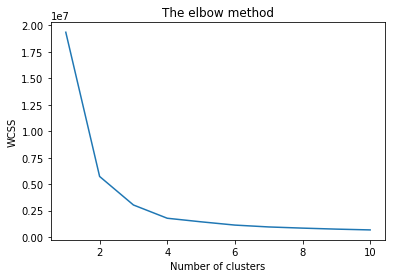

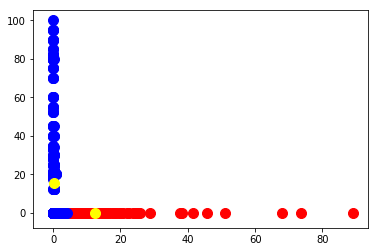

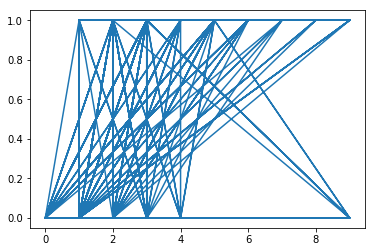

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine k
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Build a model with k
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Make predictions on validation data
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.show()

# Compare with true values for y
plt.plot(y, y_kmeans)

Bonus) Devise a means of calculating the accuracy of your predictions that are based on K-means.